# 近似值與極限（Approximation and Limit）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 近似值
許多數字是無法精確算出的  
（像是無理數）  
但我們還是可以計算出它的**近似值**

理想的近似值應該要包含一個**誤差估計項**  
比如說我們知道 $\pi = 3.14\ldots$  
意思就是 $|\pi - 3.14| \leq 0.1$ 

我們同樣仰賴 NumPy 來執行數值運算  
並用 matplotlib 中的 pyplot 來繪製函數圖形

In [2]:
import numpy as np
import matplotlib.pyplot as plt

`np.linspace(a,b,num)` 可以回傳一個  
包含 `num` 個數值的陣列 `[a, ..., b]`  
陣列中相鄰兩數的間隔都一樣

In [5]:
x = np.linspace(0,5,10)
x

array([ 0.        ,  0.55555556,  1.11111111,  1.66666667,  2.22222222,
        2.77777778,  3.33333333,  3.88888889,  4.44444444,  5.        ])

如果把陣列做基本運算  
這些基本運算會套用在陣列中的所有數字  
（`^` 和 `**` 在 Sage 中都是次方的意思）

In [8]:
y = x**2
y

array([  0.        ,   0.30864198,   1.2345679 ,   2.77777778,
         4.9382716 ,   7.71604938,  11.11111111,  15.12345679,
        19.75308642,  25.        ])

若 `x` 和 `y` 都是長度為 `k` 的陣列  
則 `plt.scatter(x,y)` 可以在二維平面上  
點出所有的 `(x[0],y[0])`, $\ldots$ , `(x[k-1],y[k-1])`  

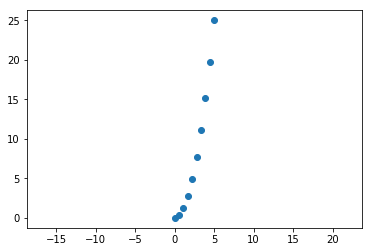

In [16]:
### 強制 x-軸和 y-軸單位長要一樣，可以取消這行試試看
plt.axis('equal')  
k = 10 ### 若增加 k 值，則可以更接近函數圖形
x = np.linspace(0,5,k)
y = x**2
plt.scatter(x,y)

### $\sqrt{2}$ 的近似值
每一個數字都可以計算平方  
哪一個數字的平方會是 2 呢？  
平方以後等於 2 的正數  
被定義為 $\sqrt{2}$

以正數來說  
數字愈大，則平方愈大  

因為 $1^2 = 1$ 比 $2$ 小  
所以 $1\leq\sqrt{2}$

因為 $2^2 = 4$ 比 $2$ 大  
所以 $1\leq\sqrt{2}\leq 2$

接著看 $1$ 和 $2$ 的中點 $1.5$  
因為 $1.5^2 = 2.25$ 比 $2$ 大  
所以 $1\leq\sqrt{2}\leq 1.5$

這個範圍可以一直縮小

In [27]:
bound = np.array([1,2], dtype=float)
np.set_printoptions(precision=20)
print(0,bound)
for _ in range(10):
    c = (bound[0]+bound[1]) / 2
    if c**2 <= 2:
        bound[0] = c
    else:
        bound[1] = c
    print(_+1, bound)

(0, array([ 1.,  2.]))
(1, array([ 1. ,  1.5]))
(2, array([ 1.25,  1.5 ]))
(3, array([ 1.375,  1.5  ]))
(4, array([ 1.375 ,  1.4375]))
(5, array([ 1.40625,  1.4375 ]))
(6, array([ 1.40625 ,  1.421875]))
(7, array([ 1.4140625,  1.421875 ]))
(8, array([ 1.4140625 ,  1.41796875]))
(9, array([ 1.4140625  ,  1.416015625]))
(10, array([ 1.4140625   ,  1.4150390625]))


### 2 的小數次方

對於一個非負整數 $n$  
$2^n$ 的意思是 $1\cdot 2\cdot 2\cdots$  
其中 $2$ 出現 $n$ 次  
所以 $2^0 = 1$、$2^1 = 2$、$2^2 = 4$、$2^3 = 8$  

如果把 $2^{0.5}$ 想像成 $2$ 乘了半次  
那 $2^{0.5}\cdot 2^{0.5}$ 就相當於  
$2$ 乘了 $1$ 次，也就是 $2$  

因此 $2^{0.5}\cdot 2^{0.5} = 2$  
而把 $2^{0.5}$ 定義成 $\sqrt{2}$ 也是自然的

遵循同樣的邏輯  
$2^{1.5} = \sqrt{2^3} = \sqrt{8} = 2\sqrt{2}$

對於所有有理數 $p/q$ 而言  
若 $2^{\frac{p}{q}}$ 這個數字乘了 $q$ 次以後  
會變成 $2^p$  

也就是說 $2^{\frac{p}{q}}$ 指的是一個正數 $x$  
而這個正數滿足 $x^q = 2^p$  
（換句話說：$2^{\frac{p}{q}}$ 是 $2^p$ 的 $q$ 次方根）

現在利用類似的方法來估算 $2^{\frac{4}{5}}$  
（也就是 $x^5 = 2^4 = 16$ 的解）

In [28]:
bound = np.array([1,2], dtype=float)
np.set_printoptions(precision=20)
print(0,bound)
for _ in range(10):
    c = (bound[0]+bound[1]) / 2
    if c**5 <= 16:
        bound[0] = c
    else:
        bound[1] = c
    print(_+1, bound)

(0, array([ 1.,  2.]))
(1, array([ 1.5,  2. ]))
(2, array([ 1.5 ,  1.75]))
(3, array([ 1.625,  1.75 ]))
(4, array([ 1.6875,  1.75  ]))
(5, array([ 1.71875,  1.75   ]))
(6, array([ 1.734375,  1.75    ]))
(7, array([ 1.734375 ,  1.7421875]))
(8, array([ 1.73828125,  1.7421875 ]))
(9, array([ 1.740234375,  1.7421875  ]))
(10, array([ 1.740234375 ,  1.7412109375]))


In [30]:
2 ** 0.8

1.74110112659225

### $\log_2 3$ 的近似值
當 $2^x$ 在 $x$ 是有理數時都有定義之後  
$2^x$ 在 $x$ 是無理數時可以用有理數去逼近  
比如說 $2^{1.4}, 2^{1.41}, 2^{1.414}, \ldots \rightarrow 2^{\sqrt{2}}$

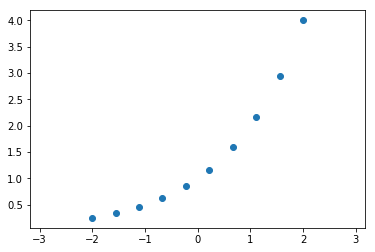

In [35]:
x = np.linspace(-2,2,10)
y = int(2)**x
plt.axis('equal')
plt.scatter(x,y)

$2^x$ 在實數線上是一個遞增的函數  
所以會有一個數字滿足 $2^x = 3$  
這個數字就定義為 $\log_{2}3$

再次用同樣的手法來逼近 $\log_{2}3$

In [36]:
bound = np.array([1,2], dtype=float)
np.set_printoptions(precision=20)
print(0,bound)
for _ in range(10):
    c = (bound[0]+bound[1]) / 2
    if 2**c <= 3:
        bound[0] = c
    else:
        bound[1] = c
    print(_+1, bound)

(0, array([ 1.,  2.]))
(1, array([ 1.5,  2. ]))
(2, array([ 1.5 ,  1.75]))
(3, array([ 1.5  ,  1.625]))
(4, array([ 1.5625,  1.625 ]))
(5, array([ 1.5625 ,  1.59375]))
(6, array([ 1.578125,  1.59375 ]))
(7, array([ 1.578125 ,  1.5859375]))
(8, array([ 1.58203125,  1.5859375 ]))
(9, array([ 1.583984375,  1.5859375  ]))
(10, array([ 1.5849609375,  1.5859375   ]))


In [38]:
np.log2(3)

1.5849625007211561

### 二分逼近法
以上的手法稱作二分逼近法  
可以用來求許多代數方程式的近似解

#### 勘根定理
若 $f(x)$ 在區間 $[a,b]$ 上是*連續*函數  
且 $f(a)f(b)<0$  
則存在一個數 $c$ 介在 $a$ 和 $b$ 之間  
使得 $f(c) = 0$

#### 二分逼近法
給定一個函數 $f(x)$  
以及數對 $a_0,b_0$  
滿足 $f(a_0)f(b_0)<0$

對 $i=0,1,2,\ldots$
令 $c_i = (a_i + b_i)/2$  
若 $f(a_i)f(c_i)\leq 0$ 則 $a_{i+1},b_{i+1} = a_{i}, c_{i}$  
否則 $a_{i+1},b_{i+1} = c_{i}, b_{i}$  

對於任何 $i$，$f(x)=0$ 在 $[a_i,b_i]$ 區間上有解

In [53]:
f = lambda x: x**2 - 5*x + 5
a,b = 1,2
print(f(a), f(b))

(1, -1)


In [59]:
bound = np.array([1,2], dtype=float)
np.set_printoptions(precision=20)
print(0,bound)
for _ in range(10):
    c = (bound[0]+bound[1]) / 2
    if f(bound[0])*f(c) <= 0:
        bound[1] = c
    else:
        bound[0] = c
    print(_+1, bound)

(0, array([ 1.,  2.]))
(1, array([ 1. ,  1.5]))
(2, array([ 1.25,  1.5 ]))
(3, array([ 1.375,  1.5  ]))
(4, array([ 1.375 ,  1.4375]))
(5, array([ 1.375  ,  1.40625]))
(6, array([ 1.375   ,  1.390625]))
(7, array([ 1.375    ,  1.3828125]))
(8, array([ 1.37890625,  1.3828125 ]))
(9, array([ 1.380859375,  1.3828125  ]))
(10, array([ 1.3818359375,  1.3828125   ]))


用公式解  
$x = \frac{5\pm\sqrt{25-20}}{2} = $

In [57]:
print(N((5+sqrt(5))/2), N((5-sqrt(5))/2))

(3.61803398874989, 1.38196601125011)


## 極限
只要我們能接受一些誤差  
並接受一些數學上的不嚴謹  
很多看似困難的計算都是可以估算出來的  
（而古人也是先有估算  
再有後期的微積分等高等數學  
來嚴謹地推導）

### 估算圓面積
單位圓的面積可以用格子數來逼近

考慮一個單位圓 $C:x^2+y^2 = 1$  
以及一個點 $(x,y)$  
若 $x^2+y^2 \leq 1$ 則點在圓內（或圓上）  
若 $x^2+y^2 > 1$ 則點在圓外

若將 $[-1,1]$ 畫分成 $n$ 等分  
則每個單位長為 $\frac{2}{n}$  
而每個格子面積為 $\frac{4}{n^2}$

大致上來說  
一個格子點可以代表一個格子  
單位圓的面積 $\sim$ 格子點數 $\times\frac{4}{n^2}$  

In [66]:
n = 10
x = np.linspace(-1,1,n+1) ### n 等分有 n+1 個分隔點
y = np.linspace(-1,1,n+1)

counter = 0 
for xx in x:
    for yy in y:
        if xx**2 + yy**2 <= 1:
            counter += 1

area = counter * 4.0 / n**2
print("area ~ %s"%area)

area ~ 3.08000000000000


老師教說單位圓的面積是  
$\pi r^2 = \pi \sim 3.14\ldots$  
（半徑 $r=1$）

#### 積分
若 $f(x)$ 為一函數  
且在 $[a,b]$ 區間上滿足 $f(x)\geq 0$  
則 $f(x)$ 在 $[a,b]$ 的**定積分**  
定義為 $f(x)$ 函數到 $x$-軸之間的面積  
記作 $\int_a^b f(x)\,dx$

比如說 $f(x) = \sqrt{1-x^2}$  
在 $[-1,1]$ 區間上是上半圓  
所以 $\int_{-1}^1 f(x)\,dx = \frac{\pi}{2}$

### 估算切線斜率
若函數上的兩點非常靠近  
我們就可以用割線的斜率來逼近切線的斜率

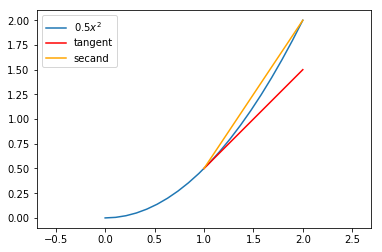

In [74]:
f = lambda x: 0.5 * x**2
plt.axis('equal')
x = np.linspace(0,2,20)
y = f(x)
plt.plot(x,y,label='$0.5 x^2$')

plt.plot([1,2], [f(1), f(1)+1], c='red',label='tangent')
plt.plot([1,2], [f(1), f(2)], c='orange', label='secand')
plt.legend()

兩點 $(x_0,y_0)$ 及 $(x_1,y_1)$  
之間的斜率為 $\frac{y_1-y_0}{x_1-x_0}$

若 $f(x)$ 為一函數  
函數上的兩點可以記作  
$(x_0, f(x_0))$ 以及 $(x_0+h, f(x_0+h))$  
當 $h$ 很小的時候，兩個點會很接近

這兩點的割線斜率為  
$\frac{f(x_0+h)-f(x_0)}{(x_0+h)-x_0} = \frac{f(x_0+h)-f(x_0)}{h}$

用這個公式來估算  
$f(x) = 0.5x^2$  
在 $x_0 = 1$ 時的切線斜率

In [75]:
f = lambda x: 0.5 * x**2
x0 = 1
hs = [1.0,0.5,0.1,0.05,0.01]
for h in hs:
    m = (f(x0+h) - f(x0)) / h
    print(h, m)

(1.00000000000000, 1.50000000000000)
(0.500000000000000, 1.25000000000000)
(0.100000000000000, 1.05000000000000)
(0.0500000000000000, 1.02500000000000)
(0.0100000000000000, 1.00500000000000)


#### 微分
若 $f(x)$ 為一函數  
且在 $x=x_0$ 時切線唯一存在  
則 $f(x)$ 在 $x=x_0$ 處的**微分**  
定義為此切線的斜率  
記作 $f'(x_0)$  
（$f'$ 讀作 f prime）

## 動手試試看

##### 練習 1

試用函數 `plt.scatter(x,y)` 在 $[-5,5]$ 上畫出函數：$f(x) = \frac{1}{3}x^3+5x-2$  
並且要用函數 `np.linspace` 將 $[-5,5]$ 分割成 $20$ 等分。

In [0]:
### your answer here

##### 練習 2

計算 $3^{\frac{3}{7}}$ 的近似值。  
（提示：利用**二分逼近法**且用for迴圈跑 20 次去逼近）

In [0]:
### your answer here

##### 練習 3

計算 $\log_5 19$ 的近似值。  
（提示：利用**二分逼近法**且用for迴圈跑 20 次去逼近） 

In [0]:
### your answer here

##### 練習 4

給定一函數 $f(x) = 8x^2 - 21x + 3$，   
利用**勘根定理**與__二分逼近法__來求其解。  
（提示：$f(0) = 3$, $f(1) = -10$, $f(3) = 12$）

In [0]:
### your answer here

##### 練習 5  

試估算 ${\frac{x^2}{4}} + {\frac{y^2}{25}} \leq 1$ 的圖形面積。  

In [0]:
### your answer here

##### 練習 6

給定一個函數 $f(x) = {\frac{1}{4}}x^5 + 3x^4 - 17x^3 -6x + 1$  
求其在 $x = 7$ 的切線斜率。

In [0]:
### your answer here

##### 練習 7

給定兩個函數 $g(x) = e^x$ 和 $h(x) = 1 + {\frac{1}{1!}}x + {\frac{1}{2!}}x^2 + {\frac{1}{3!}}x^3 + {\frac{1}{4!}}x^4$  
試用函數 `plt.plot` 將兩函數畫出來。

In [0]:
### your answer here

##### 練習 8

給定一函數 $f(x)=x^2$ ，估計 $f(x)$ 在 $[0,5]$ 區間到 $x$-軸之間的面積  

此題使用矩形進行估計，要計算面積，可以想像成把圖形切成許多直條的小矩形  
分別計算每個小矩形的面積後再相加，就可以得到面積的估計值  

我們把 $[0,5]$ 區間切成 $n$ 等分，則每個小區間的長度為 $dx = \frac{5}{n}$，同時這也是每個矩形的底邊長  
而矩形的高就是 $f$ 在那個小區間上的函數值  
因為是區間，所以 $f$ 在區間上的值可能不會相同，所以隨便取區間上的一點即可（當切的夠小的時候誤差也會變得很小）  
則矩形的面積 $A_i = f(idx)dx$ 且 $i = 1,2, \dots ,n$ （這邊取小區間上最右邊的點帶入 $f$ 當作矩形高度）  
所以，圖形面積的估計為 $\sum_{i=1}^{n}f(idx)dx$

In [0]:
### your answer here

##### 練習 9

給定一個函數 $f(x) = {\frac{1}{4}}x^5 + 3x^4 - 17x^3 -6x + 1$  
求 $f(x)$在$\int_{0}^{10} f(x)\,dx$ 的近似值。  
（提示：定積分 $\int_{a}^{b} f(x)\,dx$ 為在 $[a,b]$ 上 $f(x)$ 與**$x$-軸**之間的面積）

In [0]:
### your answer here

##### 練習 10
在 $0\leq x\leq 1$ 且 $0\leq y\leq 1$ 的方塊中  
隨機選 `K = 1000000` 個點  
並判斷有多少個點滿足 $x^2 + y^2 \leq 1$  
若這樣的點數有 `k` 個，則 `4 * k / K` 大約等於 $\pi$。  
（這方法稱作**蒙地卡羅法**）

In [0]:
### your answer here